This notebook contains code to analyze different p value thresholds used to define loci as under selection or not 

In [155]:
%pylab inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [156]:
CEU_YRI_df = pd.read_csv('diff_scores_CEU_YRI_annot.txt', sep='\t')# names = ['chrom','start','CEU_s_val','YRI_s_val','CEU_95%_CI','YRI_95%_CI','CEU_p_val','YRI_p_val','diff_score_med','diff_selection'])
CEU_CHB_df = pd.read_csv('diff_scores_CEU_CHB_annot.txt', sep='\t')
YRI_CHB_df = pd.read_csv('diff_scores_YRI_CHB_annot.txt', sep='\t')

In [157]:
def get_pval_lists(df,pop1,pop2):
    pval_list1 = list(df[pop1+'_p_val'])
    pval_list2 = list(df[pop2+'_p_val'])
    return pval_list1,pval_list2

In [158]:
def plot_threshold_s_diff(df,pop1,pop2):
    x = [0,0.0001, 0.0005,0.001,0.002, 0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,1] # threshold
    y2 = []
    y3 = []
    y4 = []

    total_per2 = df.loc[df['period'] == 2]
    total_per3 = df.loc[df['period'] == 3]
    total_per4 = df.loc[df['period'] == 4]

    df_diff_sel = df.loc[df['diff_selection'] == 'Y']

    per2 = df_diff_sel.loc[df_diff_sel['period'] == 2]
    per3 = df_diff_sel.loc[df_diff_sel['period'] == 3]
    per4 = df_diff_sel.loc[df_diff_sel['period'] == 4]

    for elem in x:
        new_per2 = per2.loc[per2['diff_score_med'] > elem]
        y2.append(len(new_per2)/len(total_per2))

        new_per3 = per3.loc[per3['diff_score_med'] > elem]
        y3.append(len(new_per3)/len(total_per3))

        new_per4 = per4.loc[per4['diff_score_med'] > elem]
        y4.append(len(new_per4)/len(total_per4))


    plt.plot(x,y2,label='Period 2')
    plt.plot(x,y3,label='Period 3')
    plt.plot(x,y4,label='Period 4')
    plt.xscale('log')
    plt.title('Threshold analysis for loci under differential selection: ' + pop1 + ' vs ' + pop2)
    plt.ylabel('Frequency')
    plt.xlabel('Difference between median s values')
    plt.legend()

In [159]:
def get_num_diff_sel(list1, list2, low, high):
    count = 0
    for i in range(0, len(list1)):
        pval1 = list1[i]
        pval2 = list2[i]
        if pval1 < low and pval2 > high:
            count = count + 1
        if pval1 > high and pval2 < low:
            count = count + 1
       
    return count

In [160]:
def plot_p_val_threshold(df,pop1,pop2):
    pval_list1, pval_list2 = get_pval_lists(df ,pop1,pop2)
    x = [0,0.001,0.005,0.01,0.05,0.1,0.15,0.2] # differences
    lower_bound = [0.001,0.005,0.01]
    y1 = []
    y2 = []
    y3 = []
    for elem in x:

        y1.append(get_num_diff_sel(pval_list1, pval_list2, 0.001, 0.001+elem)/len(pval_list1))
        y2.append(get_num_diff_sel(pval_list1, pval_list2, 0.005, 0.005+elem)/len(pval_list1))
        y3.append(get_num_diff_sel(pval_list1, pval_list2, 0.01, 0.01+elem)/len(pval_list1))

    plt.plot(x,y1,label = 'Lower bound p value: 0.001')
    plt.plot(x,y2,label = 'Lower bound p value: 0.005')
    plt.plot(x,y3,label = 'Lower bound p value: 0.01')
    plt.legend()
    plt.ylabel('Fraction of loci')
    plt.xlabel('Difference between lower bound and upper bound p value')
    plt.title('Threshold analysis for loci under differential selection: '  + pop1 + ' vs ' + pop2)

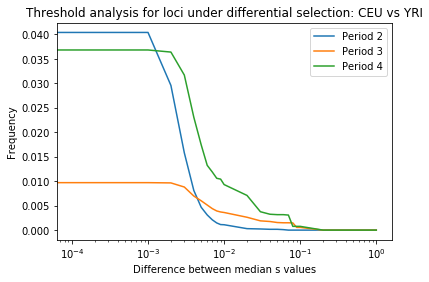

In [161]:
plot_threshold_s_diff(CEU_YRI_df, 'CEU','YRI')

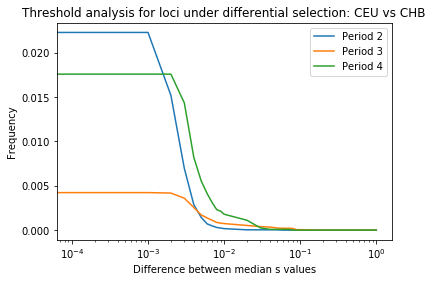

In [162]:
plot_threshold_s_diff(CEU_CHB_df, 'CEU','CHB')

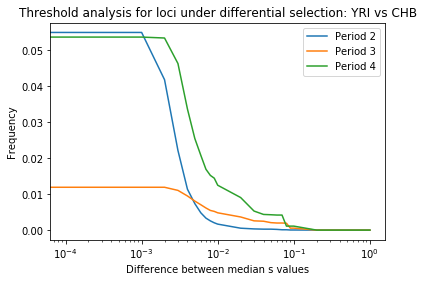

In [163]:
plot_threshold_s_diff(YRI_CHB_df, 'YRI','CHB')

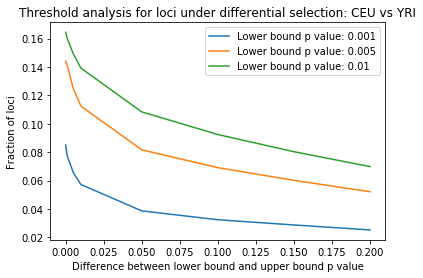

In [164]:
plot_p_val_threshold(CEU_YRI_df, 'CEU','YRI')

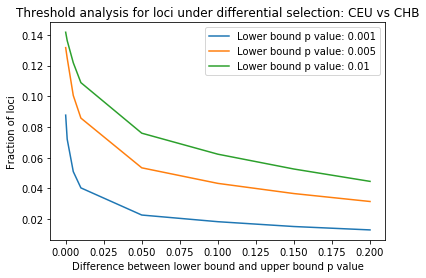

In [165]:
plot_p_val_threshold(CEU_CHB_df, 'CEU','CHB')

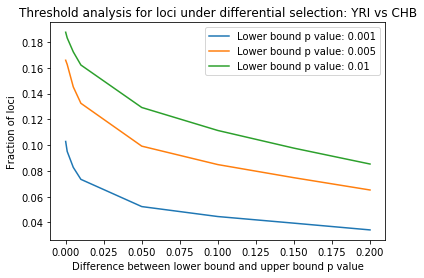

In [166]:
plot_p_val_threshold(YRI_CHB_df, 'YRI','CHB')